<a href="https://colab.research.google.com/github/vale314/machine-learning-course-CUCEI-00/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingresar nuestro data-set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Graficos embebidos.
%matplotlib inline

In [6]:
import numpy as np #importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn
import seaborn as sb

# parámetros estéticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [7]:
# Trabajando con una ruta relativa
path = './drive/MyDrive/CUCEI/ML-COURSE-JUAN/Students/' 

# Colocamos en una variable el archivo a trabajar
archivo = 'StudentsPerformance1.csv'

--- 
#### Solo correr para comprobar archivos

In [8]:
# Paquete requerido para listar los archivos del directorio
from os import listdir

In [9]:
import pandas as pd

In [10]:
Files = []
for File in listdir(path):
    # Escribir la RUTA COMPLETA de cada archivo
    Files.append(File)

In [11]:
# Mostramos los archivos del directorio que hemos decidido trabajar
Files

['StudentsPerformance.csv',
 'StudentsPerformance.gsheet',
 'StudentsPerformance1.csv']

---


### Abrir Archivo

In [12]:
df = pd.read_csv(path+archivo, index_col=0)

In [20]:
df.shape

(1000, 8)

##### La forma de nuestro data set es de 1000c x 7f

### Ver los datos

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
NaN,female,group B,bachelor's degree,standard,none,72,72,74
NaN,female,group C,some college,standard,completed,69,90,88
NaN,female,group B,master's degree,standard,none,90,95,93
NaN,male,group A,associate's degree,free/reduced,none,47,57,44
NaN,male,group C,some college,standard,none,76,78,75


### Ver Estado De Datos

In [22]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


##### Los datos Race/Ethicity son: 1000, unicos: 5, el mas usado es group c con una frecuencia de 319, para todos NaN son categoricos.

### Mostrar todos los columnas


In [23]:
for c in df.columns:
  print(c)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


---

### Histograma de  Lunch

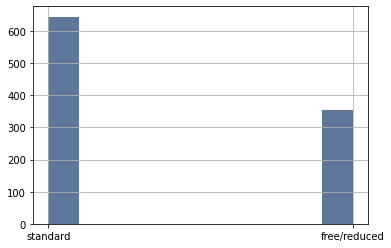

In [24]:
df['lunch'].hist()

### Histograma De Math Score [Discretizacion]

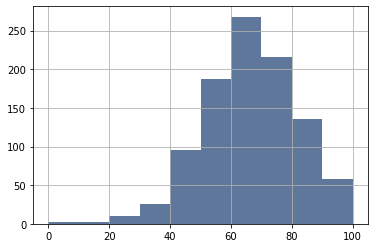

In [25]:
df['math score'].hist()

In [26]:
pd.qcut(df['ext price'], q=4)


KeyError: ignored

### Histograma De Race

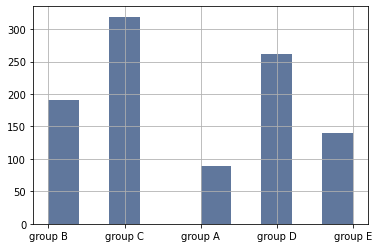

In [27]:
df['race/ethnicity'].hist()

### Histograma de Preparacion

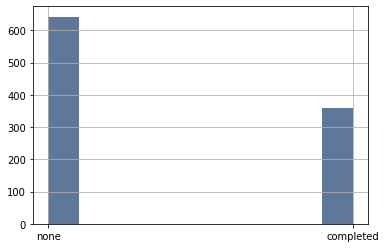

In [28]:
df['test preparation course'].hist()

### Histograma De Reading Score [Discretizacion (20)]

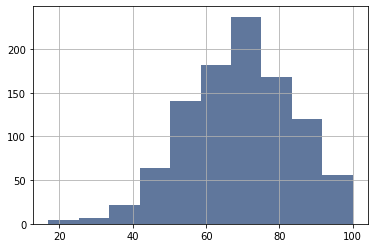

In [29]:
df['reading score'].hist()

### Histograma De Parental Level Of Education

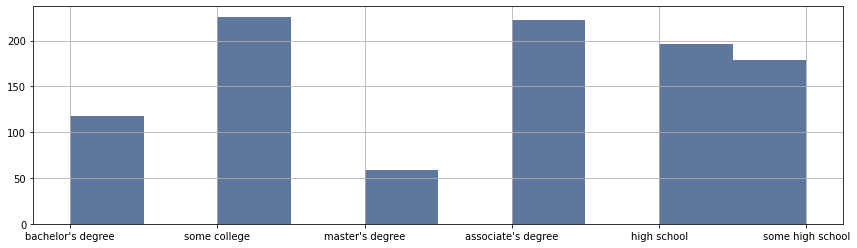

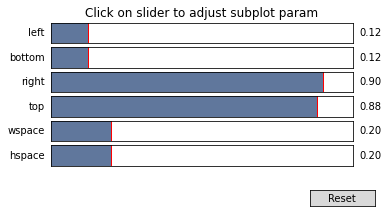

In [30]:
plt.subplot_tool()
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=3, hspace=4)
df['parental level of education'].hist()

### Histograma Writing Score [Discretizacion (20)]

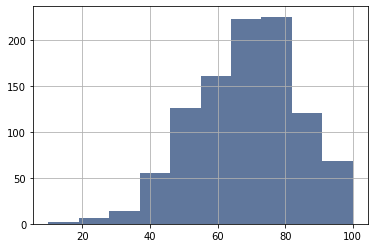

In [31]:
df['writing score'].hist()

---

### Diagrama De Dispersión 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e0266d8d0>,
      dtype=object)

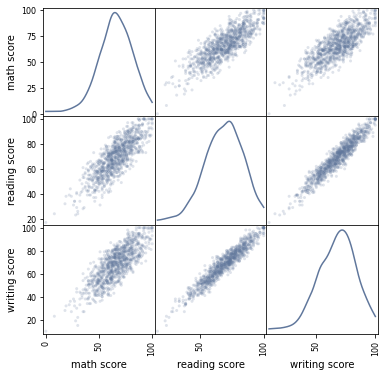

In [32]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

###Crear Nuevo DataFrama con Discretizacion




In [33]:
dfC = pd.DataFrame()

In [34]:
dfC['race/ethnicity'] = df['race/ethnicity']
dfC['parental level of education'] = df['parental level of education']
dfC['lunch'] = df['lunch']
dfC['test preparation course'] = df['test preparation course']
dfC['gender'] = df['gender']

In [35]:
dfC['math score'] = pd.qcut(df['math score'], q=4)
dfC['reading score'] = pd.qcut(df['reading score'], q=4)
dfC['writing score'] = pd.qcut(df['writing score'], q=4)

dfC.head()

,race/ethnicity,parental level of education,lunch,test preparation course,gender,math score,reading score,writing score
NaN,group B,bachelor's degree,standard,none,female,"(66.0, 77.0]","(70.0, 79.0]","(69.0, 79.0]"
NaN,group C,some college,standard,completed,female,"(66.0, 77.0]","(79.0, 100.0]","(79.0, 100.0]"
NaN,group B,master's degree,standard,none,female,"(77.0, 100.0]","(79.0, 100.0]","(79.0, 100.0]"
NaN,group A,associate's degree,free/reduced,none,male,"(-0.001, 57.0]","(16.999, 59.0]","(9.999, 57.75]"
NaN,group C,some college,standard,none,male,"(66.0, 77.0]","(70.0, 79.0]","(69.0, 79.0]"


## Crear Nuevo DataFrame Con Generalizacion

In [36]:
dfG = df.copy()

In [37]:
dfG.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
NaN,female,group B,bachelor's degree,standard,none,72,72,74
NaN,female,group C,some college,standard,completed,69,90,88
NaN,female,group B,master's degree,standard,none,90,95,93
NaN,male,group A,associate's degree,free/reduced,none,47,57,44
NaN,male,group C,some college,standard,none,76,78,75


In [38]:
dfG = pd.get_dummies(dfC, columns=["race/ethnicity"])
dfG = pd.get_dummies(dfG, columns=["gender"])
dfG = pd.get_dummies(dfG, columns=["parental level of education"])
dfG = pd.get_dummies(dfG, columns=["lunch"])
dfG = pd.get_dummies(dfG, columns=["test preparation course"])
dfG = dfG.drop('math score', axis = 1)
dfG = dfG.drop('reading score', axis = 1)
dfG = dfG.drop('writing score', axis = 1)

In [39]:
dfG['math score'] = df['math score']
dfG['reading score'] = df['reading score']
dfG['writing score'] = df['writing score']

In [40]:
dfG.head()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
NaN,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,72,72,74
NaN,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,69,90,88
NaN,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,90,95,93
NaN,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,47,57,44
NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,76,78,75


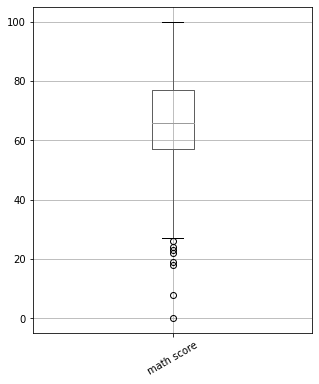

In [41]:
dfG.boxplot('math score',rot = 30,figsize=(5,6))

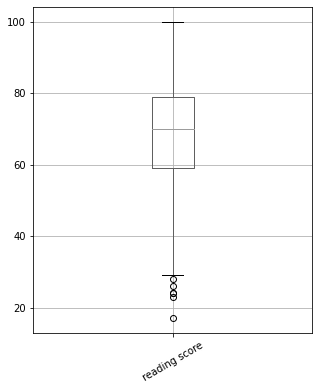

In [42]:
dfG.boxplot('reading score',rot = 30,figsize=(5,6))

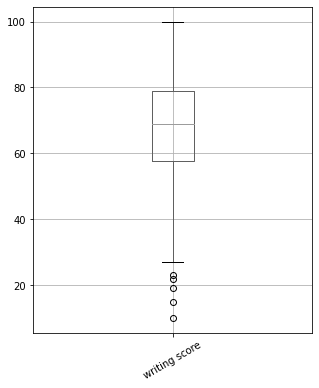

In [43]:
dfG.boxplot('writing score',rot = 30,figsize=(5,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e0b0e0f50>,
      dtype=object)

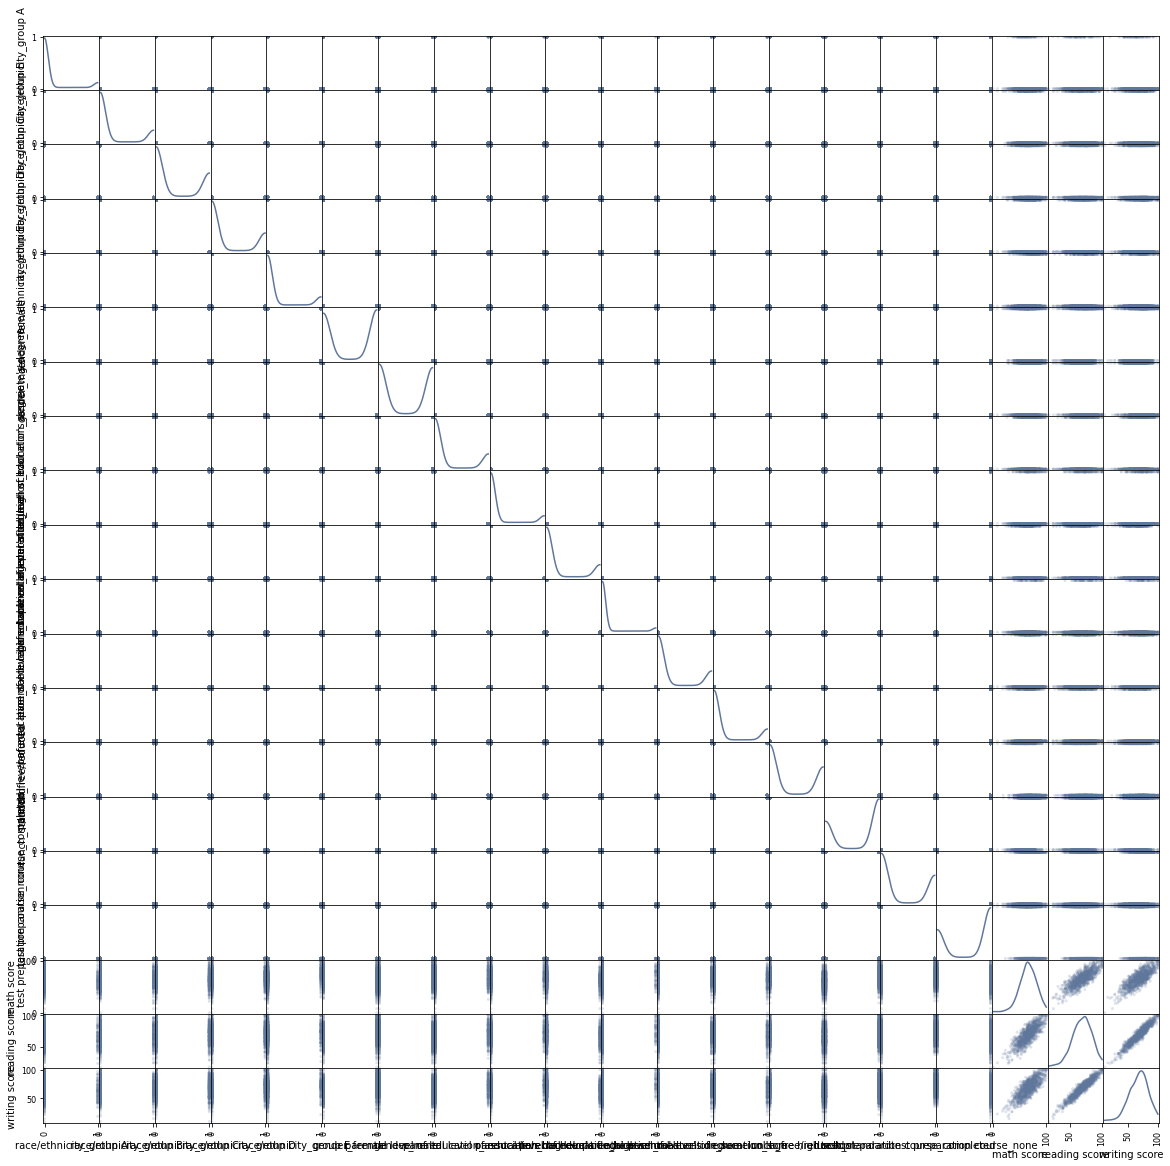

In [44]:
from pandas.plotting import scatter_matrix

scatter_matrix(dfG, alpha=0.2, figsize=(20, 20), diagonal='kde')

##Obtener la Media Aritemica  Promedio

In [45]:
dfG.mean()

race/ethnicity_group A                             0.089
race/ethnicity_group B                             0.190
race/ethnicity_group C                             0.319
race/ethnicity_group D                             0.262
race/ethnicity_group E                             0.140
gender_female                                      0.518
gender_male                                        0.482
parental level of education_associate's degree     0.222
parental level of education_bachelor's degree      0.118
parental level of education_high school            0.196
parental level of education_master's degree        0.059
parental level of education_some college           0.226
parental level of education_some high school       0.179
lunch_free/reduced                                 0.355
lunch_standard                                     0.645
test preparation course_completed                  0.358
test preparation course_none                       0.642
math score                     

##Obetner La Descivion Estandar 

#### Cuanto varian los datos de la media

In [46]:
dfG.std()

race/ethnicity_group A                             0.284886
race/ethnicity_group B                             0.392497
race/ethnicity_group C                             0.466322
race/ethnicity_group D                             0.439943
race/ethnicity_group E                             0.347161
gender_female                                      0.499926
gender_male                                        0.499926
parental level of education_associate's degree     0.415799
parental level of education_bachelor's degree      0.322770
parental level of education_high school            0.397167
parental level of education_master's degree        0.235743
parental level of education_some college           0.418448
parental level of education_some high school       0.383544
lunch_free/reduced                                 0.478753
lunch_standard                                     0.478753
test preparation course_completed                  0.479652
test preparation course_none            

### Calcular la varianza de los datos

In [47]:
dfG.var()

race/ethnicity_group A                              0.081160
race/ethnicity_group B                              0.154054
race/ethnicity_group C                              0.217456
race/ethnicity_group D                              0.193550
race/ethnicity_group E                              0.120521
gender_female                                       0.249926
gender_male                                         0.249926
parental level of education_associate's degree      0.172889
parental level of education_bachelor's degree       0.104180
parental level of education_high school             0.157742
parental level of education_master's degree         0.055575
parental level of education_some college            0.175099
parental level of education_some high school        0.147106
lunch_free/reduced                                  0.229204
lunch_standard                                      0.229204
test preparation course_completed                   0.230066
test preparation course_

#Preparando Los Datos

In [48]:
pearsoncorr = dfG.corr(method='pearson')
pearsoncorr

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
race/ethnicity_group A,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.071001,0.071001,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315,-0.091977,-0.096274,-0.110714
race/ethnicity_group B,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,0.028466,-0.028466,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106,-0.084250,-0.060283,-0.078254
race/ethnicity_group C,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.063368,-0.063368,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522,-0.073387,-0.003074,-0.010203
race/ethnicity_group D,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.030566,0.030566,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956,0.050071,0.035177,0.082032
race/ethnicity_group E,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,-0.020302,0.020302,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393,0.205855,0.106712,0.089077
gender_female,-0.071001,0.028466,0.063368,-0.030566,-0.020302,1.000000,-1.000000,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028,-0.167982,0.244313,0.301225
gender_male,0.071001,-0.028466,-0.063368,0.030566,0.020302,-1.000000,1.000000,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028,0.167982,-0.244313,-0.301225
parental level of education_associate's degree,-0.048658,-0.007238,0.037077,-0.044674,0.054922,0.004835,-0.004835,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668,0.063228,0.064386,0.064799
parental level of education_bachelor's degree,0.016307,-0.019121,0.015682,-0.020556,0.013221,0.011638,-0.011638,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,-0.013668,0.024285,-0.024285,0.079664,0.096024,0.128297
parental level of education_high school,0.004919,0.069093,0.007977,-0.042118,-0.039494,-0.037952,0.037952,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.002211,-0.002211,-0.074446,0.074446,-0.128725,-0.151068,-0.182211


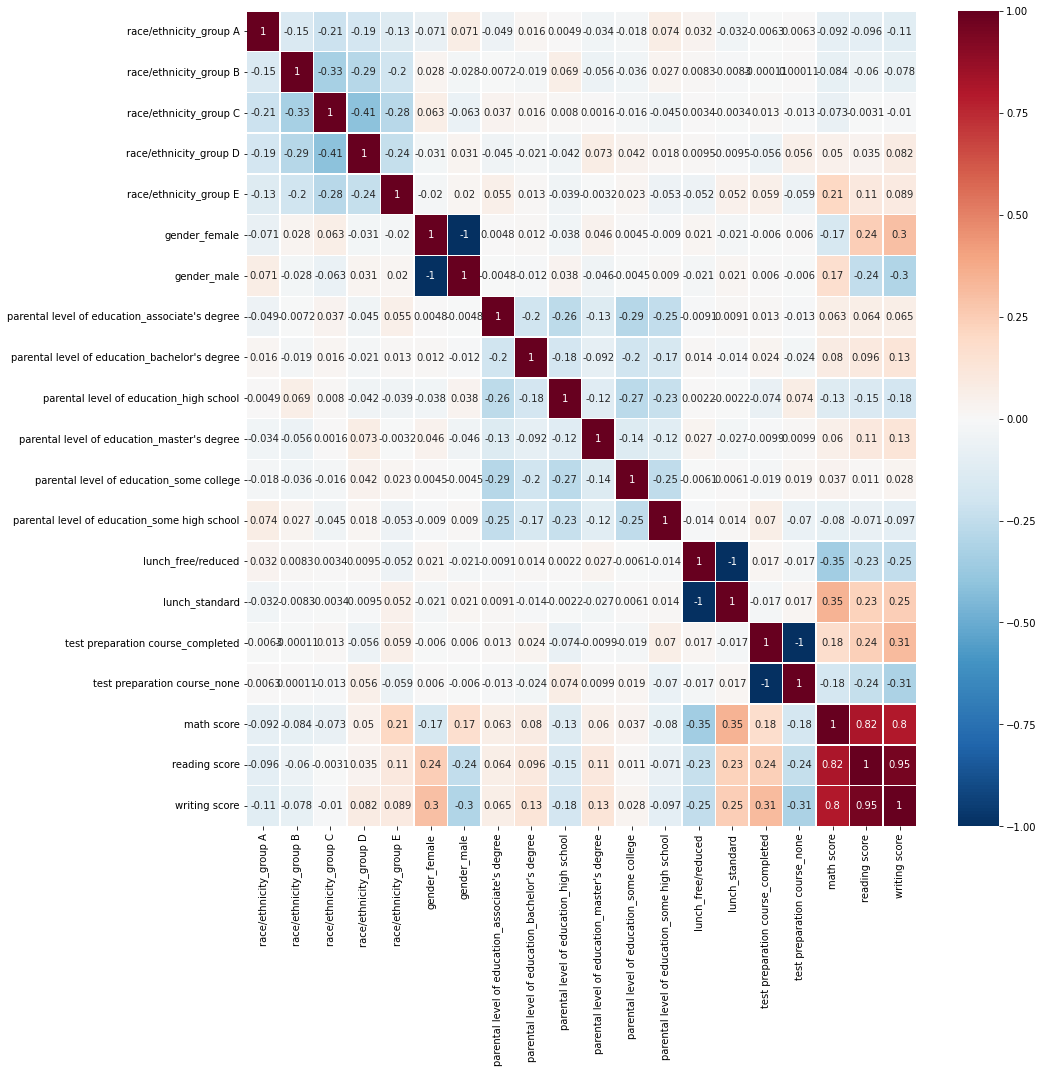

In [49]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=.5,
            ax=ax
            )

###Correlacion De Pearson en los datos numericos


In [50]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


###Conclusion Previa

En el texto y documento anterior, podemos ver cuales son las correlaciones totales de todo y las correlaciones numericas unicamente tomando los datos naturales numericos discretos. 

Podemos notar una correlacion mas alta los examenes, al tener una buena nota en una area de estudio afecta directmante la calificacion de otra.

Seguido de los tipos de comida.

#Dividir-Datos

In [51]:
from sklearn.model_selection import train_test_split 

In [52]:
train, test = train_test_split(dfG, test_size = 0.30)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  700
Ejemplos usados para test:  300


In [53]:
pearsoncorrtest = test.corr(method='pearson')
pearsoncorrtrain = train.corr(method='pearson')


###Observar Correlacion Entre Los Datos De Prueba Y Entrenamineto

In [54]:
print(pearsoncorrtrain)
print(pearsoncorrtest)

                                                race/ethnicity_group A  ...  writing score
race/ethnicity_group A                                        1.000000  ...      -0.116423
race/ethnicity_group B                                       -0.157109  ...      -0.090554
race/ethnicity_group C                                       -0.212304  ...       0.000724
race/ethnicity_group D                                       -0.192462  ...       0.113085
race/ethnicity_group E                                       -0.129852  ...       0.055479
gender_female                                                -0.079329  ...       0.287153
gender_male                                                   0.079329  ...      -0.287153
parental level of education_associate's degree               -0.041053  ...       0.079418
parental level of education_bachelor's degree                 0.004459  ...       0.091063
parental level of education_high school                       0.027042  ...      -0.178028

### Modelo

In [55]:
X = np.asarray(df[['math score','reading score','writing score']])

X[0:5]

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       [47, 57, 44],
       [76, 78, 75]])

In [56]:
from sklearn import preprocessing

In [57]:
labelencoder = preprocessing.LabelEncoder()

In [58]:
df['gender_e'] = labelencoder.fit_transform(df['gender']) 

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_e
NaN,female,group B,bachelor's degree,standard,none,72,72,74,0
NaN,female,group C,some college,standard,completed,69,90,88,0
NaN,female,group B,master's degree,standard,none,90,95,93,0
NaN,male,group A,associate's degree,free/reduced,none,47,57,44,1
NaN,male,group C,some college,standard,none,76,78,75,1


In [60]:
 y = np.asarray(df['gender_e'])

 y[0:5] 

array([0, 0, 0, 1, 1])

In [61]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       [-1.25954302, -0.83389925, -1.58374436],
       [ 0.65395415,  0.60515772,  0.45733301]])

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)

print ('Test set:', X_test.shape,  y_test.shape)


Train set: (800, 3) (800,)
Test set: (200, 3) (200,)


In [63]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
yhat = LR.predict(X_test)

yhat


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

In [65]:
yhat_prob = LR.predict_proba(X_test)

yhat_prob[:5]


array([[0.75821034, 0.24178966],
       [0.6643197 , 0.3356803 ],
       [0.46867952, 0.53132048],
       [0.61101734, 0.38898266],
       [0.21006106, 0.78993894]])

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

  if normalize:

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print("Matriz de confusión normalizada")

  else:

    print('Matriz de confusión sin normalización')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)

  plt.title(title)

  plt.colorbar()

  tick_marks = np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)

  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()

  plt.ylabel('Etiqueta Real')

  plt.xlabel('Etiqueta Predicha')

print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[72 25]
 [15 88]]


Matriz de confusión sin normalización
[[72 25]
 [15 88]]


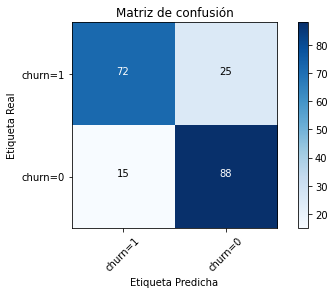

In [67]:
#Calcular la matriz de confusión

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

np.set_printoptions(precision=2)
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False, title='Matriz de confusión')


In [68]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       103
           1       0.83      0.74      0.78        97

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



#Conclusion

Como conclusion podemos decir que nuestro modelo para predecir hombres es relativamente funcional pero para predecir a las mujeres es un mal modelo pues la mayoria son falsos predictores.